In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [21]:
import alg.StellarRadio_alg
%load_ext autoreload
%autoreload 2
stellar_init = alg.StellarRadio_alg.StellarRadioAlg()
time,flux,quarter,simmf = stellar_init.run_all_steps(qmin=0,qmax=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cadence type: short
Frequency guess: 6.866323824431893
Iteration 0
mix: 1000.0 6.866323824431893 -1.0 0.0 -0.1251494288444519 -0.002428620205979577 (5.19558370973642+5.491552324297274j)
79.91606867676595 37.897896161807594 42.018172514958366
Amps: 1000.0 111.86209385859885
mix: 111.86209385859885 6.866323824431893 -1.0 0.0 -0.1251494288444519 -0.002428620205979577 (0.5811888725887426+0.6142965415299483j)
Phases: -1.0 -0.18691500041327835
mix: 111.86209385859885 6.866323824431893 -0.18691500041327835 0.0 -0.1251494288444519 -0.002428620205979577 (0.8456599473527342+6.033571113064727e-12j)
Frequencies: 6.866323824431893 6.8663192406662175
Iteration 1
mix: 111.86209385859885 6.8663192406662175 -0.18691500041327835 0.0 -0.1251494288444519 -0.002428620205979577 (0.8432465221627549-0.061800411636782265j)
1.00000109603275 0.9200231823011095 0.07997791373164032
Amps: 111.86209385859885 111.86203255639006
mi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
pickle file exists for object


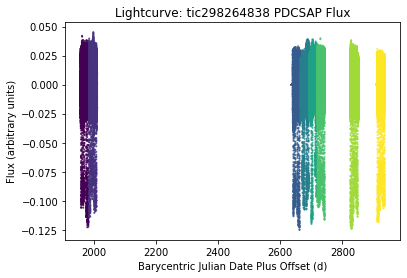

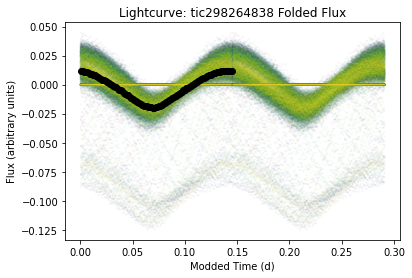

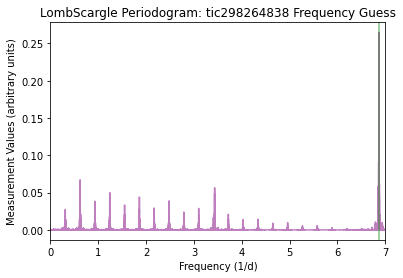

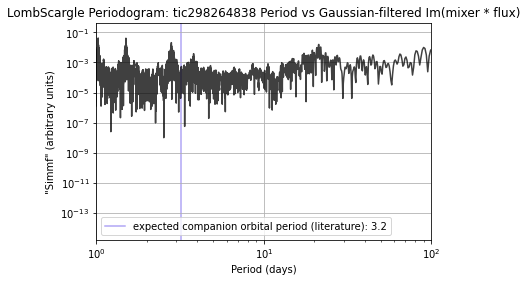

In [25]:
import alg.StellarRadio_plotting
%load_ext autoreload
%autoreload 2
plot_init = alg.StellarRadio_plotting.StellarRadioAlg_Plotting()
plot_init.do_plots()

In [ ]:
import numpy as np

# choose parameters for injected frequency
amp_fake = .0015 #flux units
freq_fake = 70 + np.e/2 #inverse days
phase_fake = 2 #0 to 2pi #radians
planet_period_fake = 17.56 #days
planet_amp_fake = 1e-3 #days -> this is about one second
planet_phase_fake = 1 #radians

print(amp_fake,freq_fake,phase_fake)

In [ ]:
distorted_time = time + planet_amp_fake * np.cos(2 * np.pi *time / planet_period_fake + planet_phase_fake) 
flux_fake = flux + amp_fake * np.cos(2*np.pi *freq_fake * distorted_time + phase_fake)

In [ ]:
time,flux_fake,quarter,simmf = stellar_init.run_all_steps(injection_flux=flux_fake,qmin=65,qmax=80)

In [ ]:
plot_init.do_plots()